# Derivace a integrál


```{admonition} Co se dozvíte v tomto textu

![](pics/polarni_vlk.jpg)

Zásadním problémem v modelování je dovednost vyjádřit rychlost procesu a s touto rychlostí pracovat. Matematice trvalo dlouho, než se tyto dovednosti vypilovaly do formy přijatelné pro použití v přírodních vědách a tato snaha vyústila v partie matematiky nazývané diferenciální a integrální počet. Toto jsou techniky, umožňující pracovat s rychlostí změny funkce a hledat buď rychlost z časového průběhu (diferenciální počet, derivace) nebo časový průběh z rychlosti (integrální počet, integrál). S oběma technikami se seznámíme v následujícím textu. 

Na rozdíl od běžně užívaných textů věnovaných této problematice se nebudeme zaměřovat na počítání příkladů na derivace a integrály, ale zdůrazníme si koncept, hlavní myšlenky a využití při formulaci matematických modelů.

Jako ukázku si představíme model ochlazování. Ten je možné použít pro modelování žádoucího ochlazování horké kávy i nežádoucího ochlazování těl živočichů v polárních oblastech. To jsou nejtypičtější začátečnické úlohy z modelování. Jedná se však o univerzální přístup, pomocí kterého později budeme schopni popisat i procesy probíhající v přírodě a ekosystémech.

*Foto: Derivace jsou základním nástrojem pro modelování systémů s deterministickým chováním. Jeden z nejjednodušeji modelovatelných procesů je model tepelné výměny. Pochopením tohoto procesu je možné odhalit, jak se živočichové žijící na sněhu a ledu brání teplotním ztrátám při kontaktu končetin se zemí. Zdroj: <https://pxhere.com/en/photo/954181>*
```

In [1]:
import numpy as np  # knihovna pro numerické výpočty
import matplotlib.pyplot as plt  # knihovna pro grafiku
import pandas as pd # knihovna pro práci s tabulkami
from scipy import integrate

Ústředním tématem přednášky je pojem derivace. Neformálně řečeno je to nástroj,
který nám umožňuje pracovat s rychlostí změny funkce. Objevení derivací mělo
obrovský dopad v přírodních vědách. Derivace jsou základním nástrojem pro práci
s měnícími se veličinami. Jsou tedy přirozeným nástrojem pro práci s dynamickými
systémy charakterizovanými proměnnými veličinami a vystavenými proměnným
podmínkám. 

Každý zvládne jednoduše vypočítat následující úkoly.

* Teplota roste konstantní rychlostí a za tři hodny naroste z teploty
  $10^\circ\mathrm C$ na $16^\circ\mathrm C$. Jak rychle teplota roste?
  (Evidentně rychlostí $2^\circ \mathrm C/\mathrm{hod}$). 
* Teplota roste konstantní rychlostí $2^\circ \mathrm C/\mathrm{hod}$. O kolik
  teplota naroste za čtyři hodiny? (Evidentně o $8^\circ \mathrm C$). 

Tyto příklady jsou extrémně jednoduché díky předpokladu, že teplota roste
konstantní rychlostí. Potom určujeme rychlost podílem změny teploty a času a
změnu určujeme součinem rychlosti a času. V této přednášce si ukážeme nástroje,
které umí dávat podobné výsledky i pro procesy probíhající proměnlivou
rychlostí.

## Průměrná rychlost a okamžitá rychlost

Budeme se zajímat o to, jak rychle se mění funkční hodnoty v čase nebo obecněji,
jak se mění při změnách vstupních dat.

Průměrnou rychlost určujeme tak, že změnu sledované veličiny přepočteme na
jednotku času (u závislosti na čase), délky (u závislosti na poloze) nebo obecně
na jednotku veličiny, na které sledovaná veličina závisí.

Průměrná rychlost s jakou se mění funkce $f$ na intervalu $[x,x+h]$ je dána
vztahem $$\frac{f(x+h)-f(x)}h.$$ 
Pozitivum tohoto vzorce je, že používá jenom dvě ze čtyř základních operací,
rozdíl a dělení. Vzorec s podílem však má i nedostatky. Výrazným nedostatkem je,
že průměrná rychlost pracuje jenom s informací v koncových bodech intervalu a
proto bohužel neobsahuje informaci, co přesně se děje uvnitř intervalu, přes
který průměrujeme. Počítáme-li ale průměr přes stále kratší interval, nevýhoda
průměrné rychlosti mizí. Naším cílem bude počítat průměr přes interval prakticky
nerozlišitelný od nuly. To by dalo okamžitou rychlost.

Pokud průměrujeme za stále kratší čas, čitatel i jmenovatel se blíží k nule a
jsou potíže s interpretací zlomku. Nulou totiž není možné dělit. Musíme vytvořit
koncept, který umožní sledovat, co se děje s funkčními hodnotami funkce, pokud
se vstupními daty jdeme ke kraji definičního oboru. K tomu použijeme pojem
limita. Budeme se (zatím) soustředit na tzv. vlastní limitu ve vlastním bodě.
Tím se oproti obecnému postupu mnohé usnadní. Zejména pojem limity můžeme opřít
o pojem spojitost, který je přece jenom intuitivnější než obecný koncept
využívající limitu jako základní pojem.


## Spojitost

Definice spojitosti zavádí jakousi třídu funkcí, které jsou v jistém smyslu
pěkné a můžeme pro ně použít postupy, které pro obecné funkce nefungují. Jsou
zde funkce, jejichž funkční hodnoty se mění plynule a nemůžou se změnit skokově.
Malá změna ve vstupních datech vyvolá malou změnu ve funkčních hodnotách.  

```{prf:definition} Okolí
:nonumber:
*Okolím* bodu $x_0$ rozumíme libovolný otevřený interval obsahující bod $x_0$.
```

```{prf:definition} Spojitost
:nonumber:
Buď $f\colon \mathbb R\to\mathbb R$ funkce jedné proměnné. Řekneme, že funkce $f$ je *spojitá v bodě* $x_0$ jestliže je v tomto bodě definovaná a pro libovolnou předem zadanou toleranci (i extrémně malou) existuje okolí bodu $x_0$ takové, že všechny body z okolí bodu $x_0$ mají funkční hodnotu v rámci uvažované tolerance nerozlišitelnou od $f(x_0)$. Řekneme, že funkce $f$ je *spojitá* na otevřeném intervalu, je-li spojitá v každém jeho bodě.
```

Definice spojitosti sice není zcela názorná, ale následující definice a věta
velmi pomůže. Zhruba řečeno vysvětlují, proč si v naprosté většině prakticky
využitelných případů můžeme spojitost ověřit jenom tím, že zjistíme, zda je
funkce definována. 

```{prf:definition} Elementární funkce
:nonumber:
Všechny mnohočleny, goniometrické, cyklometrické,
  exponenciální a logaritmické funkce a obecná mocnina se nazývají
  *základní elementární funkce* Všechny funkce, které ze základních
  elementárních funkcí získáme konečným počtem operací sčítání,
  odečítání, násobení, dělení a skládání těchto funkcí navzájem se
  nazývají *elementární funkce*.
```

```{prf:theorem} Spojitost elementárních funkcí
:nonumber:
Všechny elementární funkce jsou spojité v každém vnitřním bodě svého definičního oboru.
```

Podobně jako spojitost funkce jedné proměnné je definována spojitost funkcí více
proměnných. Zůstane dokonce v platnosti předchozí věta. V naprosté většině
základních praktických aplikací vystačíme s popisem pomocí elementárních funkcí
a proto jsou funkce, se kterými pracujeme, zpravidla automaticky spojité.
Opatrnost je nutná pouze tam, kde bychom se od elementárních funkcí odchýlili,
například při použití nekonečných řad.

```{prf:remark} Body nespojitosti
:nonumber:
Body, v jejichž okolí je funkce ohraničená, ale je zde porušena spojitost, se nazývají body nespojitosti. Typickými příklady jsou skok a odstranitelná nespojitost. (Opět se vyhneme přesné definici, ale název a vzhled grafu situaci dostatečně ozřejmí.)
 
**skok**
: Náhlá změna v jediném bodě, přičemž vlevo i vpravo od tohoto bodu je funkce spojitá. Na jeho odhalení stačí zvolit toleranci v definici spojitosti menší, než je výška skoku. Například $f(x)=\frac{|x|+x}{2x}$ je jednotkový skok v nule.

**odstranitelná nespojitost**
: Chybějící funkční hodnota. Tato nespojitost nás zajímá nejvíce. Je to nespojitost, kterou je možno odstranit vhodným dodefinováním funkční hodnoty v bodě nespojitosti. Například funkce $$f(x)= \begin{cases}   \frac {\sin x}{x}& x\neq 0\\   1& x=0 \end{cases} $$ je spojitá funkce. Vznikla doplněním jedné funkční hodnoty do definice funkce $\frac{\sin x}x$, která má odstranitelnou nespojitost v bodě $x=0$.
```

Grafy funkcí z předchozí poznámky jsou níže. Jsou vykresleny z jednotlivých bodů
a tyto body nejsou spojeny obvyklou čarou. Tím vyniknou případné nespojitosti.

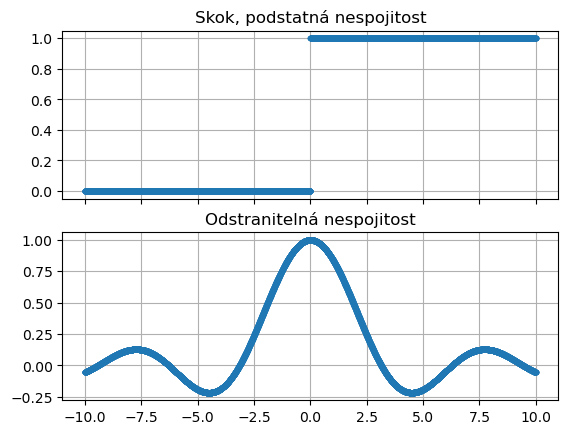

In [2]:
x = np.linspace(-10,10,10000)
fig, ax = plt.subplots(2,1, sharex=True)
funkce = [(x+np.abs(x))/(2*x), np.sin(x)/(x)]
popisky = ["Skok, podstatná nespojitost", "Odstranitelná nespojitost"]
for a,f,p in zip(ax,funkce,popisky):
    a.plot(x,f,".")
    a.set(title=p)
    a.grid()

plt.show()

## Minimalisticka varianta:
# x = np.linspace(-10,10,100)
# plt.plot(x,np.sin(x)/x,".")
# plt.plot(x,(x+np.abs(x))/x,".")

## Limita

Definici limity opřeme o pojem spojitosti. V podstatě pod limitu skryjeme buď
funkční hodnotu spojité funkce (pokud existuje), nebo hodnotu, která danou
funkci učiní spojitou. Můžeme tedy limitu považovat za  "nejlepší rozumnou
náhradu" funkční hodnoty v tom smyslu, že po předefinování jedné funkční hodnoty
se funkce stane spojitou, tj. relativně pěknou. 

```{margin} Různé definice limity

 Oproti obecné definici v literatuře je naše definice limity méně obsáhlá  (například nejsme schopni pracovat s limitou v nekonečnu) a hůře se používá (protože se opírá o pojem spojitost), pro konečné limity v konečném bodě a pro spojitost definovanou nezávisle na pojmu limita je to však ekvivalentní a pro naše potřeby názornější.
```


```{prf:definition} Limita
:nonumber:
Nechť $f$ je funkce definovaná v okolí bodu $x_0$, s případnou výjimkou bodu $x_0$. Řekneme, že funkce $f$ má v bodě $x_0$ *limitu* rovnu číslu $L$, jestliže funkce $g(x)$ definovaná vztahem $$g(x)= \begin{cases}   L& x=x_0\\ f(x)& \text {jinak,}\end{cases}$$ je spojitá v bodě $x_0$. Píšeme $$\lim_{x\to x_0}f(x)=L.$$
```

Velmi stručně řečeno: pokud se nedá nějaké číslo do funkce dosadit přímo, mohlo
by to jít pomocí limity. Například funkce $$\frac{\sin x}{x}$$ není definována v
nule. V okolí nuly se však chová v jistém smyslu pěkně: má funkční hodnoty
prakticky nerozlišitelné od jedničky, viz graf v odstavci věnovanému spojitosti.
Proto platí $$\lim_{x\to 0}\frac{\sin x}{x}=1.$$


## Definice derivace

Nyní jsme připraveni ve vzorci $$\frac{f(x+h)-f(x)}h$$ pro průměrnou rychlost
změny na intervalu délky $h$ položit $h=0$ a dosáhnout toho, že vzorec bude
udávat okamžitou rychlost. Protože bychom však přímým dosazením dostali
nedefinovaný výraz s nulou ve jmenovateli, uděláme toto dosazení v limitním
smyslu.

```{prf:definition} Derivace 
:nonumber:
*Derivací* funkce $f$ v bodě $x$ rozumíme
limitu
$$\frac{\mathrm df}{\mathrm dx}:=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h},$$
pokud tato limita existuje.
```

Derivaci funkce $f$ v bodě $x_0$ označujeme $f'(x_0)$ nebo
$\frac{\mathrm df(x_0)}{\mathrm dx}$ nebo $\frac{\mathrm df}{\mathrm dx}(x_0)$. Derivaci v libovolném bodě potom $f'$, $f'(x)$ nebo $\frac{\mathrm df}{\mathrm dx}$. Zápis $\frac{\mathrm df}{\mathrm dx}$ je Leibnizova notace, zápis $f'$ je Lagrangeova notace. Derivace podle času se označuje tečkou, například $\dot x$ (Newtonova notace). V některých oborech se používá Eulerova notace $Df$, $D_x f$ nebo $(Df)(x)$.

```{prf:remark} Slovní interpretace definice derivace
:nonumber:
Ještě jednou rozšifrujeme jednotlivé komponenty definice derivace. 
* Výraz z čitatele, tj. $f(x+h)-f(x)$, je změna veličiny $f$ na intervalu $[x,x+h]$. Často označujeme též $\Delta f$.
* Podíl, tj. $\frac{f(x+h)-f(x)}h$ je změna veličiny $f$ na intervalu $[x,x+h]$ přepočítaná na jednotku veličiny $x$, tj. v jistém smyslu průměrná rychlost na tomto intervalu. Často označujeme též $\frac{\Delta f}{\Delta x}$.
* Limita v definici derivace stahuje délku intervalu, na kterém počítáme průměrnou rychlost, k nule.  Tím se z průměrné rychlosti stane okamžitá rychlost.

```

|Část definičního vztahu|Slovní interpretace|
|:---|:---|
|$f(x)$|funkční hodnota v bodě|
|$f(x+h)$|funkční hodnota ve vedlejším bodě|
|$f(x+h)-f(x)$|změna funkce na intervalu $[x,x+h]$|
|$\displaystyle\frac{f(x+h)-f(x)}{h}$|průměrná rychlost změny funkce na intervalu $[x,x+h]$, též změna funkce po přepočtu na interval jednotkové délky|
|$\displaystyle\lim_{h\to 0}\cdots$|limita pro redukci průměrné rychlosti na okamžitou|
|$\displaystyle\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}$|okamžitá rychlost změny funkce v bodě $x$, derivace|

Pro interpretaci derivace v praktických úlohách je vodítkem i fyzikální jednotka derivace. Ta je dána následující poznámkou.

```{prf:remark} Jednotka derivace
:nonumber:
Jednotka derivace $\frac{\mathrm df}{\mathrm dx}$ funkce $f(x)$ je stejná, jako jednotka podílu $\frac {f(x)}x$.
```

## Využití derivace 

Interpretace derivace v nematematických disciplínách je okamžitá rychlost s
jakou veličina $f$ reaguje na změny veličiny $x$. Často studujeme veličiny
závislé na čase s v tomto případě jde tedy o rychlost, s jakou se veličina mění
v čase. 

Obecně, ať již je nezávislou proměnnou čas či jiná veličina, se derivace $f'(x)$
často slovně interpretuje jako změna veličiny $f$, odpovídající změně veličiny
$x$ o jednotku. Je to podobné, jako údaj o rychlosti na tachometru v automobilu.
Ten udává, kolik kilometrů ujedeme za hodinu. Od skutečně uražené dráhy se tento
údaj může lišit, protože pohyb může trvat třeba jenom deset minut. A kdyby jízda
opravdu trvala hodinu, mohlo by vlivem jízdy v zácpě dojít k podstatnému nesouladu
se skutečně uraženou dráhou. Přesto je okamžitá rychlost ukazovaná na tachometru
při jízdě automobilem užitečná veličina a nemáme problémy s jejím chápáním.
Stejně tak pohlížejme na derivaci.

Derivace (její existence a znaménko) úzce souvisí s některými vlastnostmi
funkce. Přesněji, existence derivace impĺikuje spojitost a znaménko derivace
určuje druh monotonie funkce. Přesněji viz následující dvě věty.

```{prf:theorem} Existence derivace implikuje spojitost
:nonumber:
Má-li funkce $f$ derivaci na intervalu $I$, je na tomto intervalu spojitá.
``` 
```{prf:theorem} Znaménko derivace implikuje monotonii
:nonumber:

* Má-li funkce $f$ kladnou derivaci na intervalu $I$, je na tomto intervalu rostoucí.
* Má-li funkce $f$ zápornou derivaci na intervalu $I$, je na tomto intervalu klesající.
```

```{margin} Derivace a průběh funkce

[![](https://user.mendelu.cz/marik/manim/thumbs/PrubehFunkce.jpg)](https://user.mendelu.cz/marik/manim/PrubehFunkce/)

Animace ukazuje souvislost chování funkce s chováním její derivace.
```

|Derivace funkce |Chování funkce |
|:---|:---|
|Derivace je nulová.|Funkce je konstantní. Sledovaná veličina se nemění při změně vstupních dat.|
|Derivace je kladná.|Funkce roste. Pokud data na vstupu rostou, sledovaná veličina také roste.|
|Derivace je záporná.|Funkce klesá. Pokud data na vstupu rostou, sledovaná veličina klesá.|
|Derivace je numericky malá (blízká k nule).|Funkce se mění pomalu. Sledovaná veličina reaguje na změny ve vstupních datech pouze málo.|
|Derivace je numericky velká (hodně kladná nebo hodně záporná).|Funkce se mění rychle. Malá změna na vstupu má velký vliv na sledovanou veličinu.|
|Derivace je konstantní.|Funkce je lineární. Klesá nebo roste pořád stejně rychle. Pokud vstup roste aritmetickou řadou (po stejných skocích), sledovaná veličina roste nebo klesá také aritmetickou řadou.|
|Derivace roste.|Funkce je nelineární a roste stále rychleji. Pokud je funkce kladná, rostoucí derivace znamená, že růst se stále zrychluje.|
|Derivace klesá k nule.|Funkce je nelineární a přibližuje se k vodorovné asymptotě. Pokud je funkce kladná, k nule klesající derivace znamená, že růst se stále zpomaluje a zastaví se.|

## Derivace v populační ekologii

V populační ekologii derivaci používáme k vyjádření rychlosti růstu nebo poklesu
velikosti sledované populace. Je-li velikost populace jako funkce času dána
funkcí $N(t)$, je derivace této funkce, tj. $$\frac{\mathrm dN}{\mathrm dt}$$
rychlost růstu této populace. (Záporná derivace tj. záporná rychlost růstu je
interpretována jako pokles.) Jednotka derivace je odvozena od povahy úlohy a
jednotek sledovaných veličin. Například stovky jedinců za rok.

Ekvivalentním vyjádřením rychlosti je nárůst velikosti populace za jednotku času.

Často pracujeme i s relativní rychlostí růstu, kdy rychlost růstu vztáhneme na
jednotkové množství, tj. pracujeme s funkcí $$\frac 1{N}\frac{\mathrm
dN}{\mathrm dt},$$ která se někdy v literatuře zapisuje ve formě $$\frac{\mathrm
dN}{N\mathrm dt}$$ a zpravidla se o ní mluví jako o *specifické rychlosti*
růstu, nebo jako o rychlosti růstu *per capita*.


## Model tepelné výměny

```{index} single: Model; tepelné výměny
```

```{margin} Rychlost změny teploty je ovlivněna touto teplotou

![](./pics/kava.jpg)

Ochlazování kávy probíhá tak, že se teplo z kávy předává do okolí. Tento proces je tím intenzivnější, čím je větší teplotní rozdíl kávy a okolí. Horká káva chladne rychleji než vlažná. Je to typický proces probíhající proměnnou rychlostí, kdy rychlost změny teploty souvisí i s okamžitou hodnotou této teploty. Proto fyzikální zákon vyjadřující tento proces obsahuje teplotu jako funkci času i její derivaci. S podobnou situací se setkáváme ve fyzice i v modelování přírodních dějů velmi často.
```

```{margin} Zvířata a protiproudý teplotní výměník

![](./pics/karibu.jpeg)

Zvířata žijící v polárních oblastech mají v nohách blízko sebe žíly a tepny. Tím
krev proudící do končetiny předává teplo krvi proudící zpět do těla a na konci
končetiny, kde je kontakt se sněhem a ledem, je malý teplotní rozdíl mezi
povrchem těla a okolím. Tím je dosaženo malé intenzity předávání tepla a tím
pádem malých teplotních ztrát. Podle <https://twitter.com/fuseknowledge/status/1215796937657479168>.
```

Derivace jsou přirozeným jazykem pro formulaci matematického modelu mnoha dějů v
přírodě, kdy potřebujeme pracovat s rychlostí a tato rychlost není během děje
konstantní. To znamená že změnu není možné určit jednoduše jako součin rychlosti
a času. Typickým příkladem je tepelná výměna. Rychlost vyrovnávání teplot
souvisí s teplotním rozdílem a během vyrovnávání teplot se tento teplotní rozdíl
snižuje. Tím se zpomaluje i dynamika děje. 

Horké těleso o teplotě $T$ je v chladnější místnosti o teplotě $T_\infty$. Z
fyziky je známo (Newtonův zákon tepelné výměny), že rychlost s jakou klesá
teplota tělesa je úměrná teplotnímu rozdílu. Tento rozdíl je $T-T_\infty$ (od
většího odečítáme menší).

* Veličina $T$ je teplota tělesa měřená například ve stupních Celsia.
* Veličina $t$ je čas měřený například v hodinách.
* Derivace $\frac{\mathrm dT}{\mathrm dt}$ ve stupních Celsia
  za hodinu je rychlost, s jakou roste teplota tělesa. 
   * Pokud je například derivace kladná a rovna hodnotě $5$ stupňů Celsia za
     hodinu, znamená to, že teplota roste rychlostí $5$ stupňů Celsia za hodinu. 
   * Pokud je například derivace záporná a rovna hodnotě $-5$ stupňů Celsia za
     hodinu, znamená to, že teplota klesá rychlostí $5$ stupňů Celsia za hodinu.
   * Pokud je derivace dána vztahem $-e^{-t}$, kde $t$ je čas v hodinách a
     derivace vychází ve stupních Celsia za hodinu, využijeme toho, že $e^0=1$ a
     $e^{-1}=0.37$. To znamená, že na počátku se teplota snižuje okamžitou
     rychlostí jeden stupeň Celsia za hodinu, tato rychlost ochlazování se
     pozvolna mění a například po hodině se teplota snižuje už jenom rychlostí
     $0.37$ stupně Celsia za hodinu.
* Matematickým vyjádřením toho, že rychlost s jakou se mění teplota  je úměrná
  teplotnímu rozdílu $T-T_\infty$ je rovnice 
  $$\frac{\mathrm dT}{\mathrm dt}=-k(T-T_\infty),$$ 
  kde $k$ je konstanta úměrnosti a záporné znaménko
  vyjadřuje, že teplota klesá. Konstanta $k$ je číselně rovna rychlosti
  ochlazování v situaci, kdy je jednotkový rozdíl mezi teplotou objektu a okolí. 
* Neznámou v sestavené rovnici je funkce a v rovnici figuruje derivace této
  funkce. Takové rovnice se nazývají diferenciální rovnice.
* Uvedená rovnice udává scénář vývoje systému. Je to jakési kvantitativní
  vyjádření funkce mechanismu, který vyrovnává teploty. V praxi je nutné ještě k
  plnohodnotné simulaci zadat výchozí stav. Většinou je výchozím okamžikem čas
  nula a proto se zadává výchozí stav podmínkou $$T(0)=T_0,$$ kde $T_0$ je
  počáteční teplota. Tato podmínka se nazývá počáteční podmínka.


```{hint} 
 Předchozí příklad je často v různých obměnách používán na modelování
 ochlazování kávy, což je proces, který většina lidí důvěrně zná. Nemáme
 pochopitelně ambice se domnívat, že bychom dokázali z této rovnice odvodit
 nějaké zásadní výsledky aplikovatelné při pití ranní kávy. Učíme se na malých
 věcech, abychom později mohli dělat věci velké. Na známých věcech se učíme
 aparát, který bude naším jediným nástrojem tam, kde intuice začne selhávat. Z
 tohoto příkladu je nutné si odnést, že derivace, jako rychlost změny, hraje
 roli při kvantitativním popisu dějů a při studia procesů, kdy se mění veličiny.
 Ať už doopravdy (studium pohybu nebo dějů, probíhajících v čase) nebo virtuálně
 (problémy spojené s mechanikou, včetně statiky, stability a deformací, často
 pracují s virtuálními změnami, tj. se změnami, které jsou sice z hlediska úlohy
 přípustné, ale příroda je z nějakého důvodu nerealizuje). Tedy naprostá většina
 dějů a jevů, které studujeme a chceme jim rozumět. Jakmile se v popisu
 fyzikálního zákona nebo přírodního procesu objeví slovo *rychlost*, někdy
 nahrazené souslovím *časová změna*, znamená to, že kvantitativní popis se děje
 pomocí derivací.
```

V této chvíli je pro nás cenné to, že umíme přeformulovat fyzikální popis vývoje
(rychlost změny teploty je úměrná rozdílu teplot) na kvantitativní popis, kde
dokážeme realizovat numerickou simulaci. Realizace takové simulace může vypadat
například tak, že na krátký časový krok budeme předpokládat konstantní rychlost.
Tuto rychlost použijeme pro odhad nové teploty, tato nová teplota změní teplotní
rozdíl, tím se změní i rychlost a postup opakujeme.

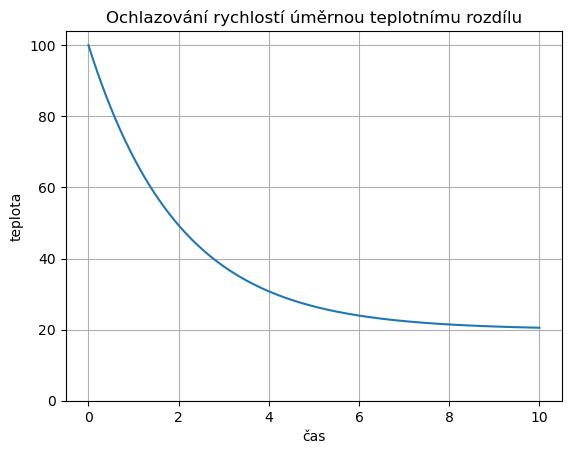

In [3]:
### Nastavení parametrů
N = 1000    # počet bodů pro výpočet
t = np.linspace(0,10,N)  # body na časové ose
dt = t[1]-t[0]  # délka kroku v čase
k = 0.5  # koeficient z rovnice
T = np.zeros(N)  # vyhrazené místo pro teploty, zatím samé nuly
T[0] = 100  # výchozí teplota
T_okoli = 20  # teplota okolí

### Výpočet modelu
for i in range(1,N):
    dT = - k*dt*(T[i-1]-T_okoli)  # změna teploty podle modelu
    T[i] = T[i-1] + dT   # teplota v dalším časovém okamžiku

### Vykreslení řešení
plt.plot(t,T)

### Dekorace grafu
plt.grid()
plt.gca().set(
    xlabel="čas",
    ylabel="teplota",
    title="Ochlazování rychlostí úměrnou teplotnímu rozdílu",
    ylim=(0,None)
);

In [4]:
### Minimalizovana verze (odpoznamkujte)
# T = 100
# t = 0
# dt = 0.1
# for i in range(100):
#     t = t+dt
#     T = T - 0.5 * (T-20) * dt
#     plt.plot([t],[T],"b.")

In [5]:
### Úplně minimalistická verze
# T = 100
# N = 100
# teploty = [T := T - 0.5 * (T-20) * 0.1 for i in range (N)]
# plt.plot(teploty)

## Analytický výpočet derivace (ad info, jde to i takto)

Analytickým výpočtem derivace rozumíme získání vzorce pro derivaci funkce z
analytického předpisu funkce, tj. ze vzorce definujícího funkční hodnoty. Toto
se naučíme později v obecnějším kontextu, až se budeme věnovat derivacím funkcí
více proměnných, parciálním derivacím.

```{important} 
Nikdy (nebo alespoň skoro nikdy) nederivujeme pomocí definice, ale používáme
[vzorce](https://raw.githubusercontent.com/robert-marik/mat-slidy/master/cheatsheet/cheatsheet-MT.pdf)
pro derivace základních elementárních funkcí a pro derivace matematických
operací s funkcemi. Další možností je využití systémů počítačové algebry, které
umožňují pracovat se symbolickými výrazy namísto numerických dat. V programu
Python je možno použít knihovnu SymPy.
```

Při analytickém výpočtu derivace používáme pravidla pro derivování základních
elementárních funkcí a pravidla pro derivaci matematických operací. Nám budou
stačit pouze základní vzorce, které uvedeme nejprve slovně.

* Derivace konstantní funkce je nulová funkce. 
* Derivace součtu funkcí je součet derivací těchto funkcí.
* Derivace konstantního násobku funkce je konstantní násobek derivace této funkce.
* Derivace složené funkce je součinem derivace vnější a vnitřní složky.
* Derivace funkce $x$ je rovna jedné.
* Derivace funkce $e^x$ je $e^x$. 

Tedy pro funkce $f$ a $g$ proměnné $x$ a konstantu $c$ platí následující vzorce.
$$\begin{aligned}
\frac{\mathrm dc}{\mathrm dx} &= 0\cr
\frac{\mathrm d}{\mathrm dx}(f+g) &= \frac{\mathrm df}{\mathrm dx} + \frac{\mathrm dg}{\mathrm dx}\cr
\frac{\mathrm d}{\mathrm dx}(cf) &= c\frac{\mathrm df}{\mathrm dx}\cr
\frac{\mathrm df}{\mathrm dx} &= \frac{\mathrm df}{\mathrm dg} \frac{\mathrm dg}{\mathrm dx}\cr
\frac{\mathrm d}{\mathrm dx}(x) &= 1\cr
\frac{\mathrm d}{\mathrm dx}(e^x) &= e^x
\end{aligned}$$


## Numerický výpočet derivace (ad info, kdyby bylo potřeba)

Numerickým výpočtem derivace rozumíme výpočet číselné hodnoty derivace funkce z
funkčních hodnot vypočtených ve vhodných bodech definičního oboru funkce,
zpravidla v rovnoměrně rozmístěných bodech na intervalu konečné délky. Tento
výpočet může být a bývá zatížen zaokrouhlovací chybou. 

Numerický výpočet se realizuje v případě, že není k dispozici analytický vzorec
pro funkci, nebo není efektivní či nutné využít analytický postup. Provádí se
zpravidla tak, že vstupem je funkce definovaná v bodech rovnoměrně rozložených
na jejím definičním oboru a namísto derivace jako okamžité rychlosti počítáme
průměrnou rychlost. K tomu se využijí sousední body a odhad pro derivaci v bodě
$x$ poté je $$ \frac{\mathrm d f}{\mathrm dx}=
\frac{f(x+h)-f(x-h)}{2h}+\mathcal O(h^2),$$ 
kdy asymptotika je uvažována v okolí nuly. Tento vzorec se nazývá *centrální
diference* s krokem $h$. V krajních bodech definičního oboru nemáme k dispozici
oba sousední body a proto se používá k výpočtu dopředná a zpětná diference dané
po řadě vztahy $$\frac{\mathrm df}{\mathrm dx}=\frac{f(x+h)-f(x)}{h}+\mathcal
O(h)$$  a $$\frac{\mathrm df}{\mathrm dx}=\frac{f(x)-f(x-h)}{h}+\mathcal O(h).$$

Všimněte si, že centrální diference je o řád přesnější než dopředná nebo zpětná
diference. Pro $h=0.01$ jsou $\mathcal O(h)$ řádově setiny, kdežto $\mathcal O(h^2)$ 
jsou řádově desetitisíciny.

Graf funkce a její derivace je na následujícím obrázku. Mřížka je nakreslena pro
pravou osu, protože funkční hodnoty funkce (škála na levé svislé ose) nejsou
podstatné a derivaci nevlivní. Derivace nesleduje číselné hodnoty jako takové,
ale sleduje, jak rychle se tyto hodnoty mění. Funkce nejprve klesá, její
derivace je záporná. V minimu se pokles obrátí v růst a derivace se změní ze
záporné na kladnou. V minimu je tedy derivace rovna nule. Poté funkce roste a
roste stále rychleji. To znamená, že derivace také roste.

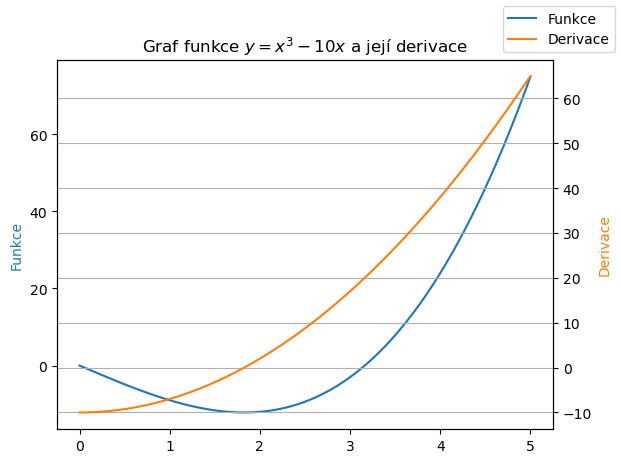

In [6]:
x = np.linspace(0,5,500)  # body na vodorovné ose
y = x**3-10*x  # funkční hodnoty
dydx = np.gradient(y,x)   # !!! výpočet derivace

fig, ax = plt.subplots()
ax2 = ax.twinx()          # každý graf má svou svislou osu
ax.plot(x,y,label="Funkce")
ax2.plot(x,dydx,label="Derivace",color="C1")

fig.legend()
plt.title(r"Graf funkce $y=x^3-10x$ a její derivace")
ax.set(ylabel="Funkce")
ax2.set(ylabel="Derivace")
ax.yaxis.get_label().set_color("C0") 
ax2.yaxis.get_label().set_color("C1")
ax2.grid();

## Integrál a jeho využití (volitelně, pro zájemce)

Naučili jsme se pracovat s derivacemi, tedy s rychlostí změny.
Známe-li funkci a zderivujeme ji, dostaneme rychlost změny. Pokud potom
původní funkci "ztratíme" a zůstane nám jenom derivace, je otázka,
jestli dokážeme původní funkci z této derivace najít. Odpověď zní, že v
jistém smyslu ano. Spojení "v jistém smyslu" naznačuje, že souvislost
nebude tak snadná jako je souvislost u navzájem inverzních
funkcí. Derivováním totiž můžeme ztratit aditivní konstanty, které v
derivaci dávají nulu a zpětně není možné rekonstruovat, derivováním
jaké konstanty jsme tuto nulu dostali. 

```{prf:definition} Neurčitý integrál
:nonumber:
Řekneme, že funkce $F$ je *primitivní funkcí* k funkci $f$ na intervalu $I$, jestliže platí $$F'(x)=f(x)$$ na intervalu $I$. Množina všech primitivních funkcí k funkci $f$ se nazývá *neurčitý integrál* funkce $f$ a značí $$\int f(x)\,\mathrm dx.$$
```

Platí následující.

* Ke každé spojité funkci existuje neurčitý integrál.
* Primitivní funkce je dána jednoznačně až na aditivní konstantu.

```{prf:remark} Veličina vypočtená z rychlosti své změny
Pokud se veličina $f(t)$ mění v čase rychlostí $r(t)$, platí $$f(t)=\int r(t)\,\mathrm dt,$$ přičemž pravá strana je dána jednoznačně až na aditivní konstantu. To koresponduje s pozorováním, že rychlost změn k jednoznačné identifikaci časového průběhu měnící se veličiny nestačí. Je potřeba mít zadán ještě výchozí stav.
```

Neurčitý integrál není dán jednoznačně. Proto je někdy výhodnější počítat pouze
změnu měnící se veličiny, tj. určovat rozdíl na konci a na začátku intervalu. To
vede na poněkud odlišné pojetí integrálu.

```{prf:definition} Newtonův určitý integrál
:nonumber:
Buď $f$ funkce a $F$ její
primitivní funkce na intervalu $I$. Buď $[a,b]\subset I$ podinterval v
$I$. *Určitým integrálem funkce $f$ na intervalu $[a,b]$* rozumíme
veličinu označenou a definovanou vztahem $$\int_a^b f(x)\mathrm
dx:=F(b)-F(a).$$
```

```{prf:remark} Změna veličiny vypočtená pomocí rychlosti
Pokud se veličina $f(t)$ mění v časovém intervalu od $t=a$ do $t=b$ rychlostí $r(t)$, je změna veličiny $f$ za tento časový okamžik rovna $$\Delta f=f(b)-f(a)=\int_a^b r(t)\,\mathrm dt.$$
```

* Určitý integrál je možno numericky aproximovat i bez znalosti primitivní
  funkce. Je možno použít funkci `numpy.trapz`, `scipy.integrate.trapezoid`
  pokud je funkce dána pomocí hodnot, nebo `scipy.integrate.quad`, pokud je
  funkce dána funkčním předpisem.
* Neurčitý integrál je možno vypočítat pomocí určitého integrálu jako funkci horní meze.
  $$\int f(x)\,\mathrm dx  = \int_{0}^x f(t) \,\mathrm dt +C$$ 

Následující sada příkazů vypočítá pro zadanou funkci $f(x)$ primitivní funkci
jako integrál $$\int_0^x f(t)\,\mathrm dt$$ a funkci i její integrál vykreslí.
Výpočet zajišťuje funkce `scipy.integrate.cumulative_trapezoid`. Kromě toho je
možné počítat integrály i analyticky použitím knihovny `sympy`, to však v našich
výpočtech potřebovat nebudeme.

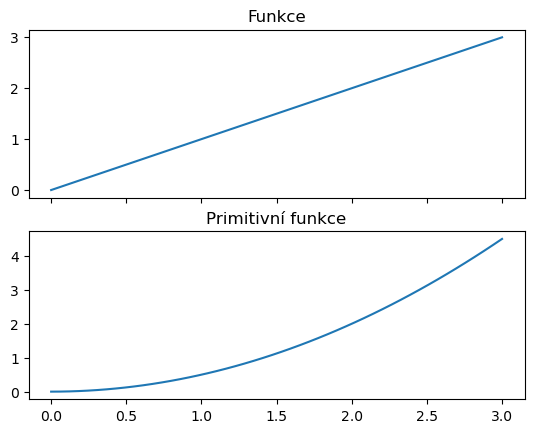

In [7]:
def f(x):
    return x

x = np.linspace(0,3)
y = f(x)

integral = integrate.cumulative_trapezoid(y,x,initial=0)

fig,ax = plt.subplots(2,1, sharex=True)
ax[0].plot(x,y)
ax[1].plot(x,integral)
ax[0].set(title="Funkce")
ax[1].set(title="Primitivní funkce");

Integrál je tedy možno použít k nalezení funkce, pokud víme, jak rychle se tato
funkce mění v čase. Bohužel naprostá většina procesů probíhajících v přírodě
souvisí ne s časem, ale s velikostí měnící se veličiny. Například rychlost s
jakou roste populace jelenů souvisí s velikostí této populace (větší populace
jelenů má více plodných laní) a ne s časem. (V roce 2020 roste stejná populace
stejně rychle jako v roce 2016.) Viděli jsme to i na modelu tepelné výměny, kdy
rychlost změny teploty nesouvisela přímo s časem, ale souvisela s dosaženou
teplotou. V takových případech je nutné použít speciální aparát nazývaný
diferenciální rovnice, který si představíme v další přednášce.